# 1. Import Libraries/Dataset

## a. Import the required libraries and the dataset

In [2]:
import tensorflow as tf\
    , glob, os, numpy as np, PIL, matplotlib.pyplot as plt

## b. Check the GPU available

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
tf.zeros((1, 1)).gpu()

Instructions for updating:
Use tf.identity instead.


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

# 2. Data Visualization and augmentation

## a. Plot at least two samples from each class of the dataset

-- Class : n01440764


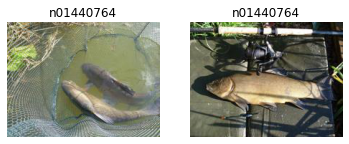

-- Class : n02102040


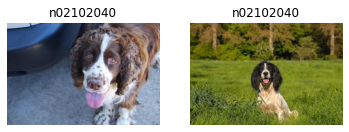

-- Class : n02979186


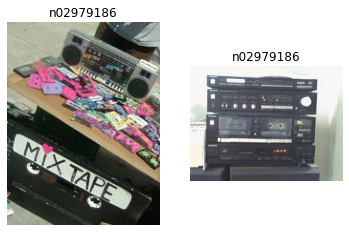

-- Class : n03000684


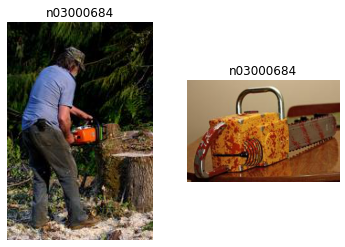

-- Class : n03028079


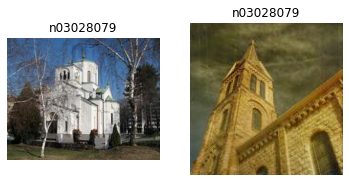

-- Class : n03394916


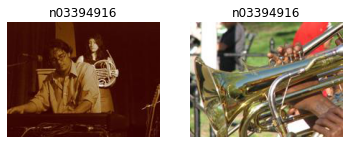

-- Class : n03417042


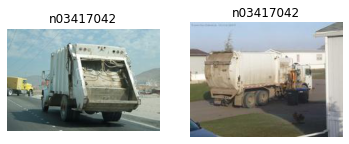

-- Class : n03425413


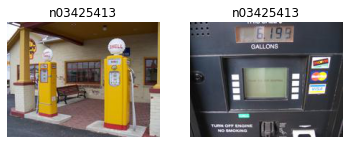

-- Class : n03445777


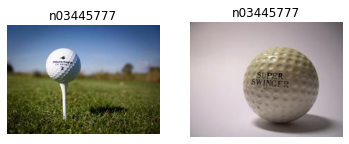

-- Class : n03888257


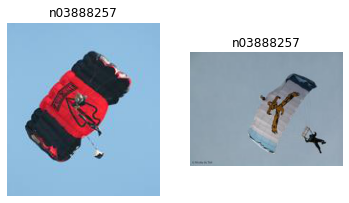

In [21]:
for i, c in enumerate(glob.glob('data/imagenette2-160/train/**')):
    print(f"-- Class : {os.path.basename(c)}")
    _, axs = plt.subplots(1, 2)
    ims = glob.glob(f'{c}/*.JPEG')
    for ii in range(2):
        im = PIL.Image.open(ims[ii])
        axs[ii].imshow(im)
        axs[ii].set_title(os.path.basename(c))
        axs[ii].axis("off")
    plt.show()

## b. Apply rotation and height shift augmentation (horizontal_flip, width_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

-- Class : n01440764


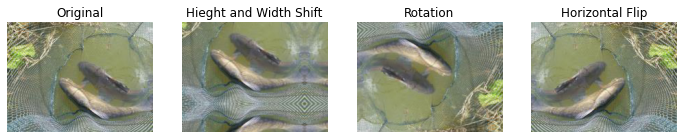

-- Class : n02102040


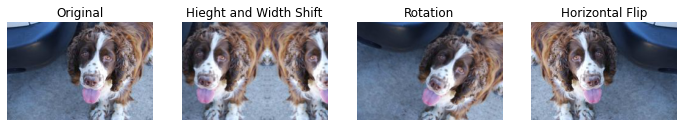

-- Class : n02979186


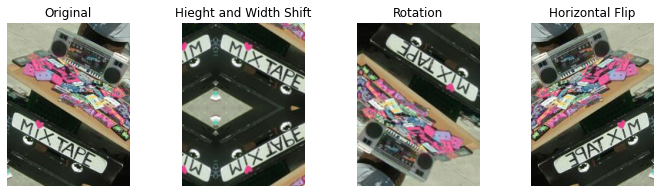

-- Class : n03000684


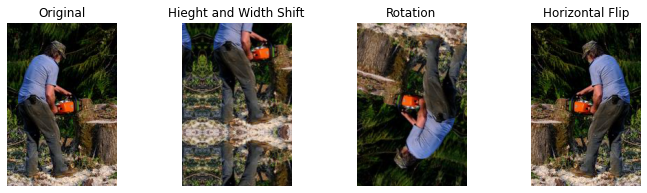

-- Class : n03028079


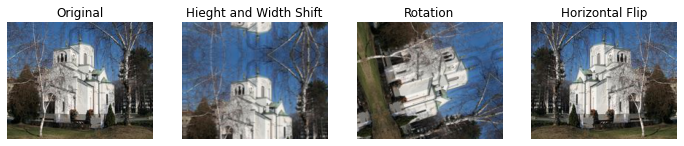

-- Class : n03394916


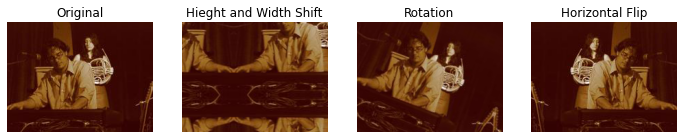

-- Class : n03417042


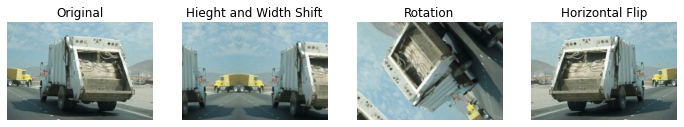

-- Class : n03425413


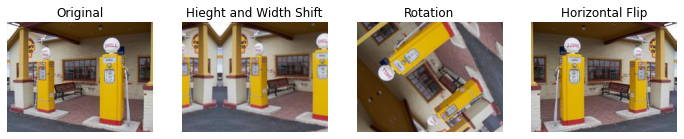

-- Class : n03445777


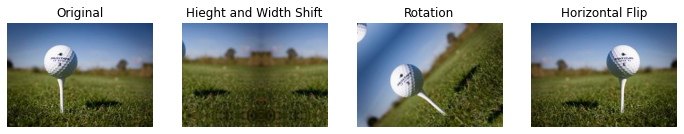

-- Class : n03888257


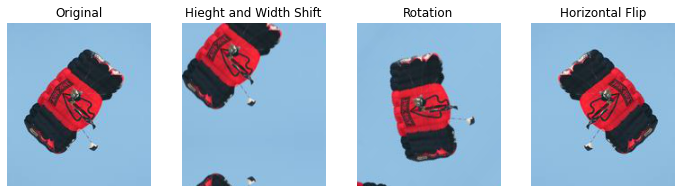

In [53]:
for i, c in enumerate(glob.glob('data/imagenette2-160/train/**')):
    print(f"-- Class : {os.path.basename(c)}")
    im_size = 3
    cols = 4
    _, axs = plt.subplots(1, cols, figsize=(im_size*cols,im_size))
    im = glob.glob(f'{c}/*.JPEG')[0]
    arr = np.array(PIL.Image.open(im), dtype='ubyte')
    #
    axs[0].imshow(arr)
    axs[0].set_title("Original")
    #
    axs[1].imshow(tf.keras.preprocessing.image.random_shift(arr, 0.5, 0.5, 0, 1, 2, 'reflect'))
    axs[1].set_title("Hieght and Width Shift")
    #
    axs[2].imshow(tf.keras.preprocessing.image.random_rotation(arr, 360, 0, 1, 2, 'reflect'))
    axs[2].set_title("Rotation")
    #
    axs[3].imshow(tf.image.flip_left_right(arr).numpy())
    axs[3].set_title("Horizontal Flip")
    #
    [ax.axis("off") for ax in axs]
    plt.show()
    

## c. Bring the train and test data in the required format.

In [175]:
def norm(arr):
    "Convert and array with range 0,255 to -1,1"
    return (arr - 127)/128

def denorm(arr):
    "Convert and array with range -1,1 to 0,255"
    return (arr*128)+127

train_dl = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.5,
    height_shift_range=0.5,
#     brightness_range=(0, 0.5),
    shear_range=0.5,
    zoom_range=0.5,
    fill_mode='reflect',
    horizontal_flip=True,
    vertical_flip=True,
#     rescale=1,
    preprocessing_function=norm
    
).flow_from_directory(
    'data/imagenette2-160/train'
)
valid_dl = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1,
    preprocessing_function=norm
).flow_from_directory(
    'data/imagenette2-160/val'
)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [176]:
train_dl

## d. Print the shapes of train and test data.

In [177]:
x_batch, y_batch = next(train_dl)

In [178]:
x_batch.shape

(32, 256, 256, 3)

X batch shape explaination:
- 32 is the batch_Size 
- 256, 256 is image height and width
- 3 is channels of image

In [179]:
y_batch.shape

(32, 10)

Y batch shape explaination:
- 32 is the batch_Size 
- 10 is the number of classes as this is categorical data and y will be in format one hot encodings

## Plotting some samples from the dataloader

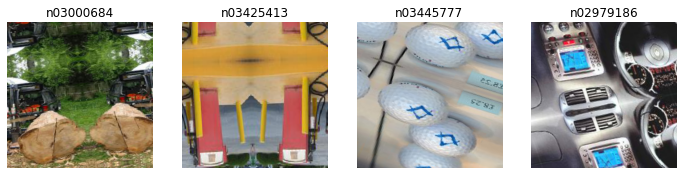

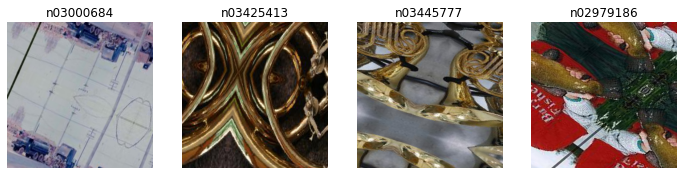

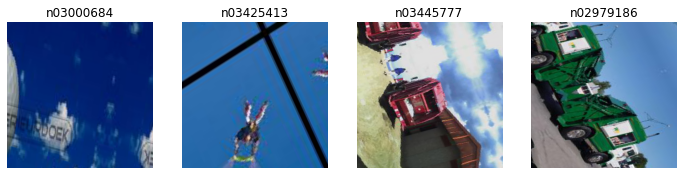

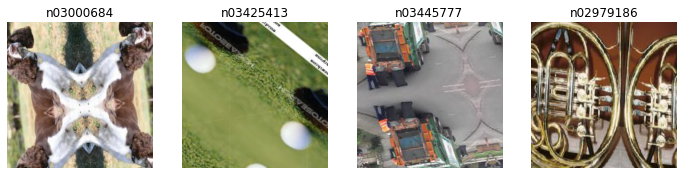

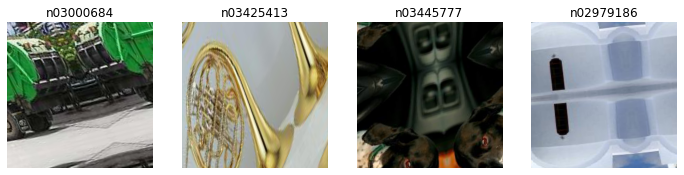

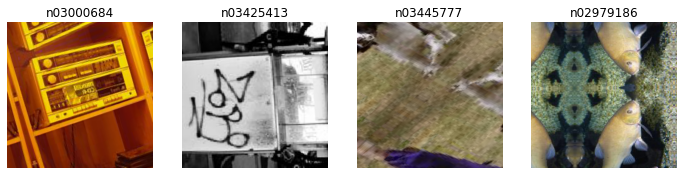

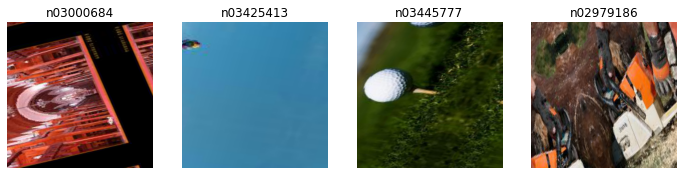

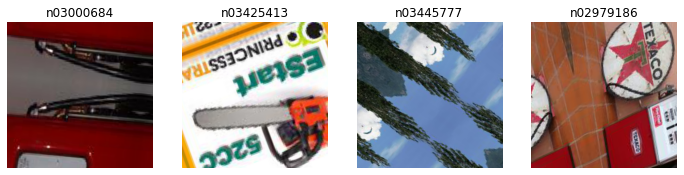

In [180]:
i = 0
cols=4
reverse_class_maping = {j:i for i,j in train_ds.class_indices.items()}
while True:
    if i>=x_batch.shape[0]:
        break
    _, axs = plt.subplots(1, cols, figsize=(3*cols, 3))
    for ii in range(cols):
        if i>=x_batch.shape[0]:
            break
        arr = denorm(x_batch[i]).astype('ubyte')
        axs[ii].imshow(arr)
        axs[ii].set_title(reverse_class_maping[y_batch[ii].argmax()])
        axs[ii].axis("off")
        i+=1
    plt.show()